# Spotify Listening Data Analysis

This notebook analyzes your Spotify listening history to uncover patterns, trends, and insights about your music consumption.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from data_loader import load_spotify_data, get_data_summary

plt.style.use('default')
sns.set_palette("husl")

%matplotlib inline

In [2]:
df = load_spotify_data()
summary = get_data_summary(df)

print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
df.head()

Loading data from combined_data.json...
Loaded 49,050 listening records
Preprocessing data...
Preprocessing complete!
Date range: 2023-06-01 to 2025-10-01
Total listening time: 122547.8 minutes (2042.5 hours)
Dataset loaded successfully!
Shape: (49050, 37)


,ts,platform,ms_played,conn_country,ip_addr,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,...,year,minutes_played,seconds_played,media_type,track_name,track_artist,album_name,is_skip,is_complete_play,listening_session
0,2023-06-01 01:21:02+00:00,linux,70544,CA,99.250.31.37,How Deep Is Your Love,Bee Gees,Greatest,spotify:track:2JoZzpdeP2G6Csfdq5aLXP,None,...,2023,1.175733,70.544,song,How Deep Is Your Love,Bee Gees,Greatest,True,False,0
1,2023-06-01 01:22:03+00:00,linux,32735,CA,99.250.31.37,Put Your Head On My Shoulder,Paul Anka,Put Your Head On My Shoulder: The Very Best Of...,spotify:track:2DpJ9T2RVRanZcYFHKOAfA,None,...,2023,0.545583,32.735,song,Put Your Head On My Shoulder,Paul Anka,Put Your Head On My Shoulder: The Very Best Of...,False,False,0
2,2023-09-26 13:13:05+00:00,android,0,CA,149.57.28.219,How Deep Is Your Love,Bee Gees,Greatest,spotify:track:2JoZzpdeP2G6Csfdq5aLXP,None,...,2023,0.000000,0.000,song,How Deep Is Your Love,Bee Gees,Greatest,True,False,1
3,2023-09-26 13:13:13+00:00,android,7797,CA,149.57.28.219,Just the Two of Us (feat. Bill Withers),"Grover Washington, Jr.",Anthology,spotify:track:1ko2lVN0vKGUl9zrU0qSlT,None,...,2023,0.129950,7.797,song,Just the Two of Us (feat. Bill Withers),"Grover Washington, Jr.",Anthology,True,False,1
4,2023-09-26 13:13:22+00:00,android,6783,CA,149.57.28.219,Can't Take My Eyes off You,Frankie Valli,Solo,spotify:track:0bfvHnWWOeU1U5XeKyVLbW,None,...,2023,0.113050,6.783,song,Can't Take My Eyes off You,Frankie Valli,Solo,True,False,1


## 📊 Data Overview

In [3]:
for key, value in summary.items():
    print(f"{key.replace('_', ' ').title()}: {value}")

Total Tracks: 49050
Unique Tracks: 5386
Unique Artists: 1574
Unique Albums: 2886
Date Range: 2023-06-01 to 2025-10-01
Total Listening Hours: 2042.5
Avg Daily Hours: 3.56
Skip Rate: 38.7
Media Breakdown: {'song': '47958 (97.8%)', 'podcast': '761 (1.6%)', 'audiobook': '331 (0.7%)'}


## 🎵 Top Artists & Tracks

In [4]:
top_artists = df.groupby('track_artist')['minutes_played'].sum().sort_values(ascending=False).head(100)
print('Top 100 Artists by Listening Time:')
print('\n'.join([f"{i+1}. {artist}: {minutes_played:.2f} minutes" for i, (artist, minutes_played) in enumerate(top_artists.items())]))

top_tracks = df.groupby(['track_name', 'track_artist'])['minutes_played'].sum().sort_values(ascending=False).head(100)
track_labels = [f"{track} - {artist}" for (track, artist) in top_tracks.index]
print('\nTop 100 Tracks by Listening Time:')
print('\n'.join([f"{i+1}. {label}: {minutes_played:.2f} minutes" for i, (label, minutes_played) in enumerate(zip(track_labels, top_tracks.values))]))

most_played_artists = df['track_artist'].value_counts().head(100)
print('\nTop 100 Artists by Play Count:')
print('\n'.join([f"{i+1}. {artist}: {count} plays" for i, (artist, count) in enumerate(most_played_artists.items())]))

most_played_tracks = df.groupby(['track_name', 'track_artist']).size().sort_values(ascending=False).head(100)
track_labels = [f"{track} - {artist}" for (track, artist) in most_played_tracks.index]
print('\nTop 100 Tracks by Play Count:')
print('\n'.join([f"{i+1}. {label}: {count} plays" for i, (label, count) in enumerate(zip(track_labels, most_played_tracks.values))]))

top_albums = df.groupby('album_name')['minutes_played'].sum().sort_values(ascending=False).head(100)
print('\nTop 100 Albums by Listening Time:')
print('\n'.join([f"{i+1}. {album}: {minutes_played:.2f} minutes" for i, (album, minutes_played) in enumerate(top_albums.items())]))

most_played_albums = df['album_name'].value_counts().head(100)
print('\nTop 100 Albums by Play Count:')
print('\n'.join([f"{i+1}. {album}: {count} plays" for i, (album, count) in enumerate(most_played_albums.items())]))


Top 100 Artists by Listening Time:
1. Porter Robinson: 37300.22 minutes
2. Laufey: 11284.32 minutes
3. AJR: 9863.55 minutes
4. Radiohead: 9254.84 minutes
5. Ed Sheeran: 3335.29 minutes
6. Twenty One Pilots: 2598.00 minutes
7. The Steve Dangle Podcast: 2556.78 minutes
8. Frank Sinatra: 2347.69 minutes
9. Lex Fridman Podcast: 1892.69 minutes
10. Noah Kahan: 1359.34 minutes
11. Coldplay: 1203.52 minutes
12. Clairo: 1187.47 minutes
13. Jon Bellion: 1150.32 minutes
14. Bill Wurtz: 1145.94 minutes
15. Bo Burnham: 1093.03 minutes
16. Chappell Roan: 948.51 minutes
17. The Joe Rogan Experience: 819.66 minutes
18. Adam Wong: 785.76 minutes
19. Taylor Swift: 696.27 minutes
20. ericdoa: 678.77 minutes
21. Luca Maxim: 624.03 minutes
22. Steve Jobs: 605.35 minutes
23. Wallows: 585.14 minutes
24. Olivia Rodrigo: 523.34 minutes
25. Beyond: 517.71 minutes
26. Arctic Monkeys: 502.44 minutes
27. The Mountain Goats: 496.51 minutes
28. Santo & Johnny: 482.74 minutes
29. JJ Lin: 479.99 minutes
30. Po-uta: 4

## ⏰ Listening Patterns Over Time

In [5]:
daily_listening = df.groupby('date')['minutes_played'].sum().reset_index()

fig = px.line(daily_listening, x='date', y='minutes_played', 
              title='Daily Listening Time Over Time',
              labels={'minutes_played': 'Minutes Played', 'date': 'Date'})
fig.update_layout(height=400)
fig.show()

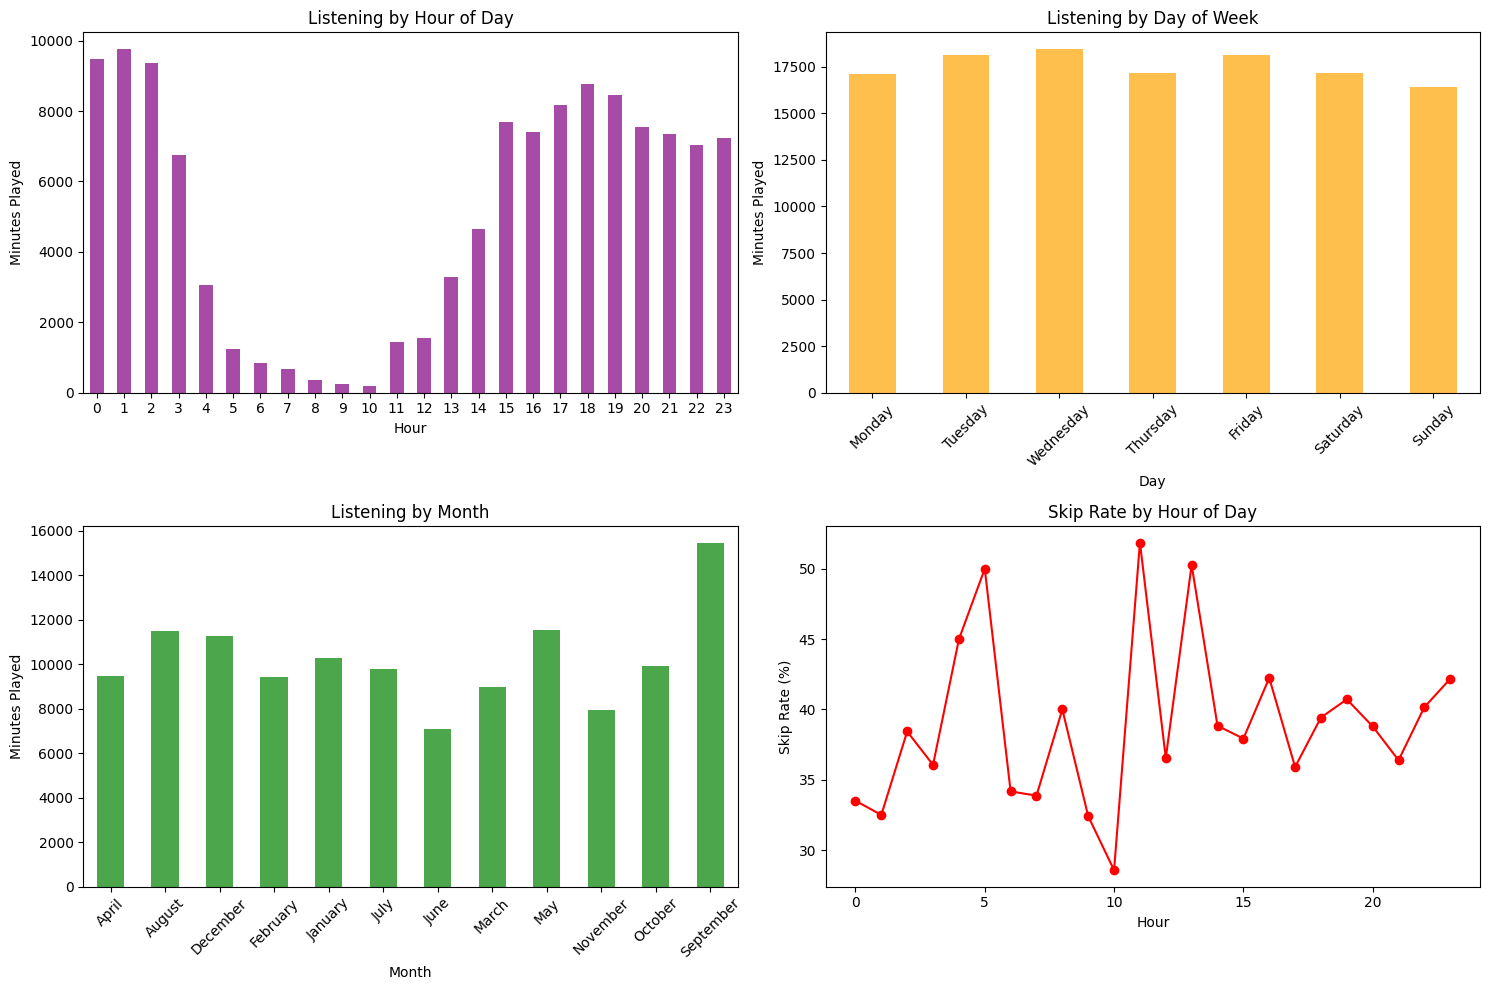

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

hourly_listening = df.groupby('hour')['minutes_played'].sum()
hourly_listening.plot(kind='bar', ax=axes[0,0], color='purple', alpha=0.7)
axes[0,0].set_title('Listening by Hour of Day')
axes[0,0].set_xlabel('Hour')
axes[0,0].set_ylabel('Minutes Played')
axes[0,0].tick_params(axis='x', rotation=0)

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_listening = df.groupby('day_of_week')['minutes_played'].sum().reindex(day_order)
daily_listening.plot(kind='bar', ax=axes[0,1], color='orange', alpha=0.7)
axes[0,1].set_title('Listening by Day of Week')
axes[0,1].set_xlabel('Day')
axes[0,1].set_ylabel('Minutes Played')
axes[0,1].tick_params(axis='x', rotation=45)

monthly_listening = df.groupby('month')['minutes_played'].sum()
monthly_listening.plot(kind='bar', ax=axes[1,0], color='green', alpha=0.7)
axes[1,0].set_title('Listening by Month')
axes[1,0].set_xlabel('Month')
axes[1,0].set_ylabel('Minutes Played')
axes[1,0].tick_params(axis='x', rotation=45)

skip_by_hour = df.groupby('hour')['is_skip'].mean() * 100
skip_by_hour.plot(kind='line', ax=axes[1,1], color='red', marker='o')
axes[1,1].set_title('Skip Rate by Hour of Day')
axes[1,1].set_xlabel('Hour')
axes[1,1].set_ylabel('Skip Rate (%)')

plt.tight_layout()
plt.show()

## 🎯 Listening Behavior Analysis

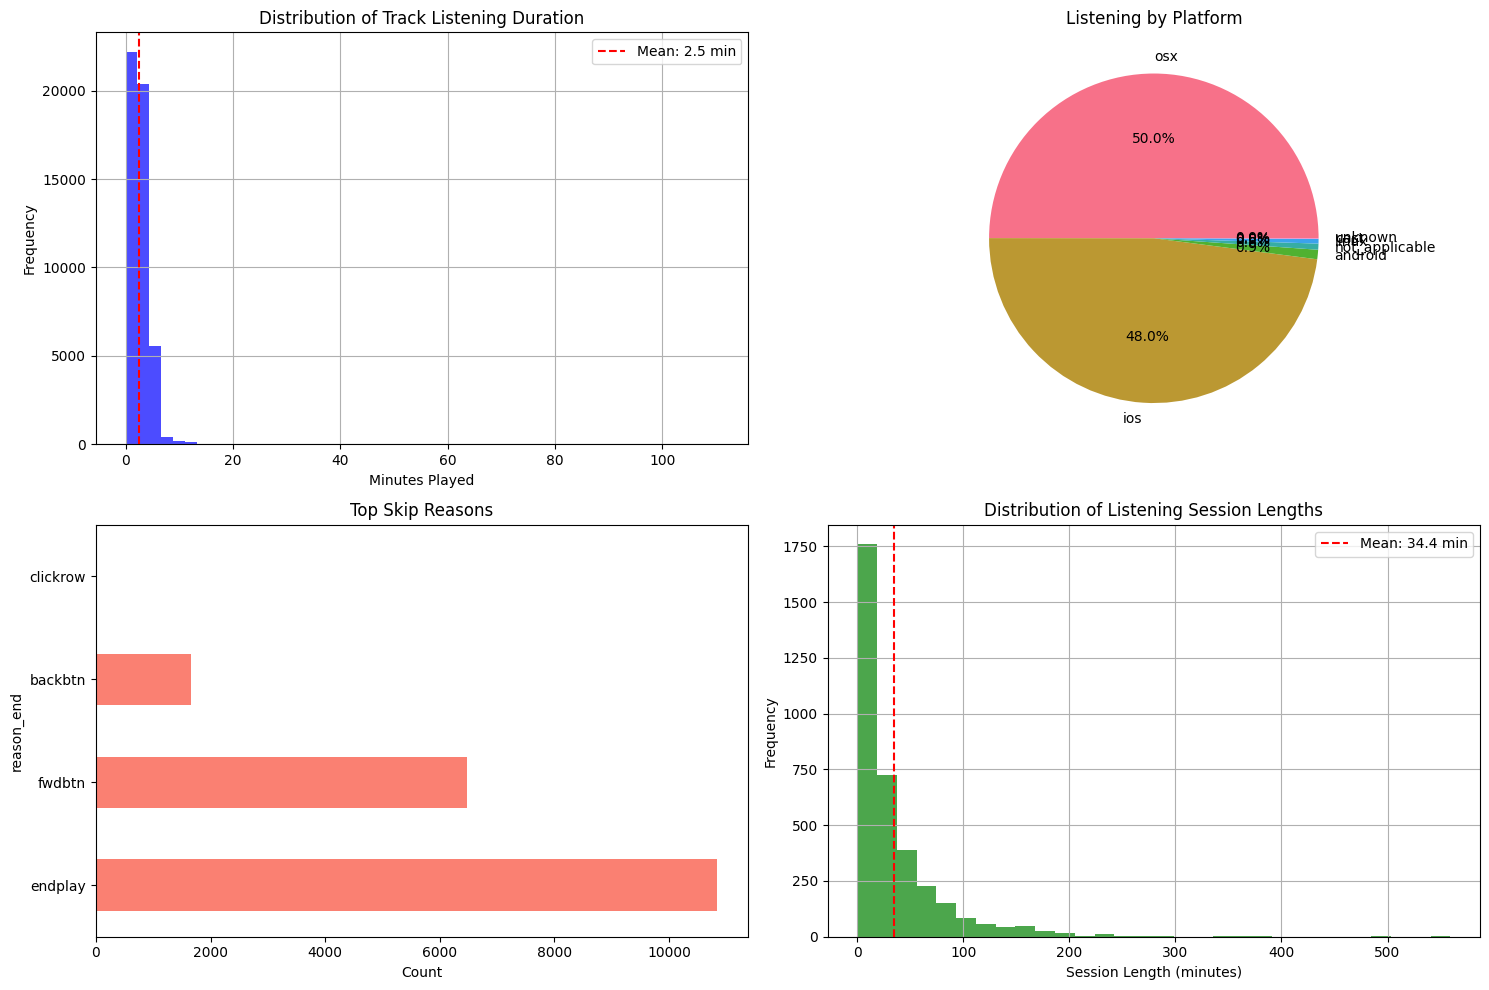

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

df['minutes_played'].hist(bins=50, ax=axes[0,0], alpha=0.7, color='blue')
axes[0,0].set_title('Distribution of Track Listening Duration')
axes[0,0].set_xlabel('Minutes Played')
axes[0,0].set_ylabel('Frequency')
axes[0,0].axvline(df['minutes_played'].mean(), color='red', linestyle='--', label=f'Mean: {df["minutes_played"].mean():.1f} min')
axes[0,0].legend()

platform_counts = df['platform'].value_counts()
platform_counts.plot(kind='pie', ax=axes[0,1], autopct='%1.1f%%')
axes[0,1].set_title('Listening by Platform')
axes[0,1].set_ylabel('')

skip_reasons = df[df['is_skip']]['reason_end'].value_counts().head(10)
skip_reasons.plot(kind='barh', ax=axes[1,0], color='salmon')
axes[1,0].set_title('Top Skip Reasons')
axes[1,0].set_xlabel('Count')

session_lengths = df.groupby('listening_session')['minutes_played'].sum()
session_lengths.hist(bins=30, ax=axes[1,1], alpha=0.7, color='green')
axes[1,1].set_title('Distribution of Listening Session Lengths')
axes[1,1].set_xlabel('Session Length (minutes)')
axes[1,1].set_ylabel('Frequency')
axes[1,1].axvline(session_lengths.mean(), color='red', linestyle='--', label=f'Mean: {session_lengths.mean():.1f} min')
axes[1,1].legend()

plt.tight_layout()
plt.show()

## 🔍 Advanced Analysis

In [8]:
artist_diversity = df.groupby('date')['track_artist'].nunique().reset_index()
artist_diversity.columns = ['date', 'unique_artists']

fig = px.scatter(artist_diversity, x='date', y='unique_artists',
                title='Musical Diversity Over Time (Unique Artists per Day)',
                labels={'unique_artists': 'Unique Artists', 'date': 'Date'})
fig.update_layout(height=400)
fig.show()

In [9]:
repeat_listening = df.groupby(['track_name', 'track_artist']).agg({
    'minutes_played': 'sum',
    'ts': 'count'
}).rename(columns={'ts': 'play_count'}).reset_index()

repeat_listening['avg_minutes_per_play'] = repeat_listening['minutes_played'] / repeat_listening['play_count']

fig = px.scatter(repeat_listening, 
                x='play_count', 
                y='minutes_played',
                size='avg_minutes_per_play',
                hover_data=['track_name', 'track_artist'],
                title='Track Popularity vs Total Listening Time',
                labels={'play_count': 'Number of Plays', 'minutes_played': 'Total Minutes Played'})
fig.update_layout(height=500)
fig.show()

## 📈 Custom Analysis

Use the cells below for your own custom analysis!

In [10]:
print("Available columns for analysis:")
print(df.columns.tolist())

Available columns for analysis:
['ts', 'platform', 'ms_played', 'conn_country', 'ip_addr', 'master_metadata_track_name', 'master_metadata_album_artist_name', 'master_metadata_album_album_name', 'spotify_track_uri', 'episode_name', 'episode_show_name', 'spotify_episode_uri', 'audiobook_title', 'audiobook_uri', 'audiobook_chapter_uri', 'audiobook_chapter_title', 'reason_start', 'reason_end', 'shuffle', 'skipped', 'offline', 'offline_timestamp', 'incognito_mode', 'date', 'hour', 'day_of_week', 'month', 'year', 'minutes_played', 'seconds_played', 'media_type', 'track_name', 'track_artist', 'album_name', 'is_skip', 'is_complete_play', 'listening_session']


In [11]:
# First, create the week_number column if it doesn't exist
if 'week_number' not in df.columns:
    df['week_number'] = df['ts'].dt.isocalendar().week

# Calculate average daily, weekly, monthly and yearly listening time
daily_avg_listening_time = df.groupby('date')['minutes_played'].sum().mean()
weekly_avg_listening_time = df.groupby('week_number')['minutes_played'].sum().mean()
monthly_avg_listening_time = df.groupby('month')['minutes_played'].sum().mean()
yearly_avg_listening_time = df.groupby('year')['minutes_played'].sum().mean()

print('Average daily listening time: {:.2f} hours'.format(daily_avg_listening_time/60))
print('Average weekly listening time: {:.2f} hours'.format(weekly_avg_listening_time/60))
print('Average monthly listening time: {:.2f} hours'.format(monthly_avg_listening_time/60))
print('Average yearly listening time: {:.2f} hours'.format(yearly_avg_listening_time/60))

Average daily listening time: 3.46 hours
Average weekly listening time: 39.28 hours
Average monthly listening time: 170.21 hours
Average yearly listening time: 680.82 hours


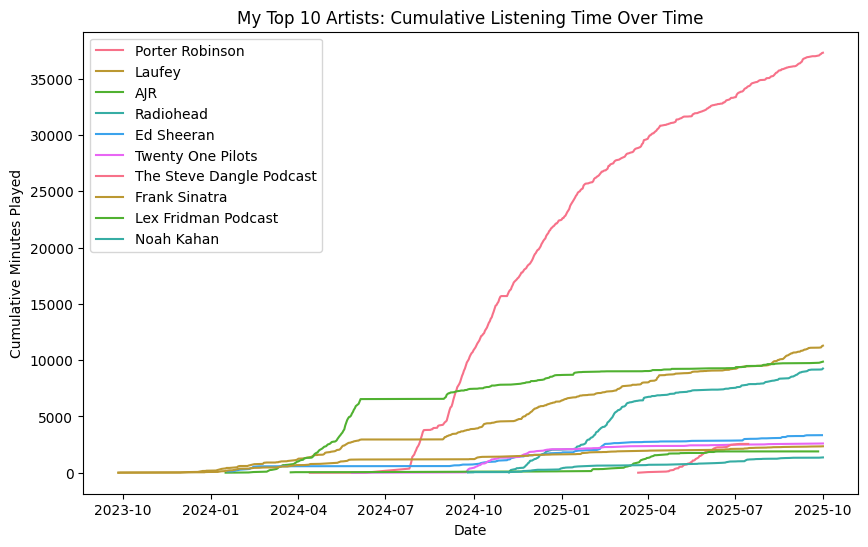

In [12]:
top_10_artists = df.groupby('track_artist')['minutes_played'].sum().sort_values(ascending=False).head(20)
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('My Top 10 Artists: Cumulative Listening Time Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Minutes Played')
for artist in top_10_artists.index[:10]:
    streams = df[df.track_artist == artist].groupby('date')['minutes_played'].sum()
    cumulative_streams = streams.cumsum()
    ax.plot(cumulative_streams.index, cumulative_streams.values, label=artist)
ax.legend()


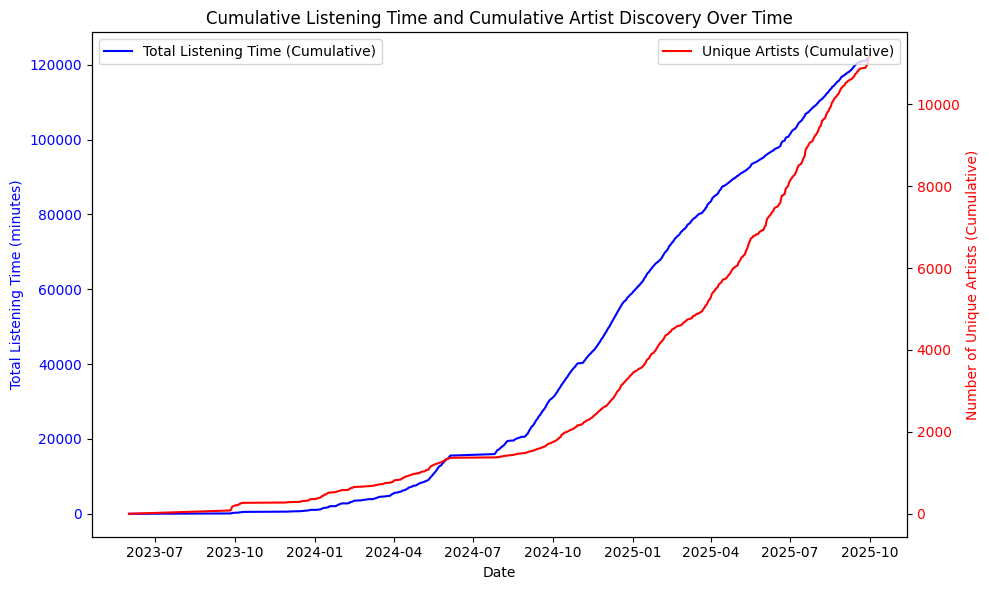

In [13]:
fig, ax = plt.subplots(figsize=(10,6))

# Group by date and calculate daily totals
daily_listening = df.groupby('date')['minutes_played'].sum()
daily_artists = df.groupby('date')['track_artist'].nunique()

# Calculate cumulative listening time
cumulative_listening = daily_listening.cumsum()

# Calculate cumulative unique artists
cumulative_artists = daily_artists.cumsum()

# Plot cumulative listening time on primary y-axis
ax.plot(cumulative_listening.index, cumulative_listening.values, color='blue', label='Total Listening Time (Cumulative)')
ax.set_xlabel('Date')
ax.set_ylabel('Total Listening Time (minutes)', color='blue')
ax.tick_params(axis='y', labelcolor='blue')

# Create secondary y-axis for cumulative unique artists
ax2 = ax.twinx()
ax2.plot(cumulative_artists.index, cumulative_artists.values, color='red', label='Unique Artists (Cumulative)')
ax2.set_ylabel('Number of Unique Artists (Cumulative)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add legends
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Cumulative Listening Time and Cumulative Artist Discovery Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Porter Robinson Analysis
Total listening time: 37300.2 minutes (621.7 hours)
Total plays: 12,060
Unique songs: 70
Unique albums: 20
Date range: 2024-04-13 to 2025-10-01

Top Albums by Listening Time:
1. Nurture: 15081.2 minutes
2. SMILE! :D: 14591.1 minutes
3. Worlds: 5376.0 minutes
4. Everything Goes On: 633.7 minutes
5. Russian Roulette: 463.2 minutes
6. Language: 440.6 minutes
7. Shelter: 323.5 minutes
8. Cheerleader: 130.6 minutes
9. Knock Yourself Out XD: 115.3 minutes
10. Musician: 57.2 minutes

Top Songs by Listening Time:
1. Russian Roulette: 5555.9 minutes
2. Sad Machine: 3126.9 minutes
3. Cheerleader: 2922.4 minutes
4. Musician: 2378.5 minutes
5. Look at the Sky: 2097.5 minutes
6. Wind Tempos: 1878.2 minutes
7. Trying to Feel Alive: 1793.9 minutes
8. Something Comforting: 1440.0 minutes
9. Knock Yourself Out XD: 1428.1 minutes
10. Get Your Wish: 1159.5 minutes


/var/folders/kh/kff3nbhs1zl422ky9tgx8jp00000gn/T/ipykernel_95885/2324406366.py:48: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.

/var/folders/kh/kff3nbhs1zl422ky9tgx8jp00000gn/T/ipykernel_95885/2324406366.py:53: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



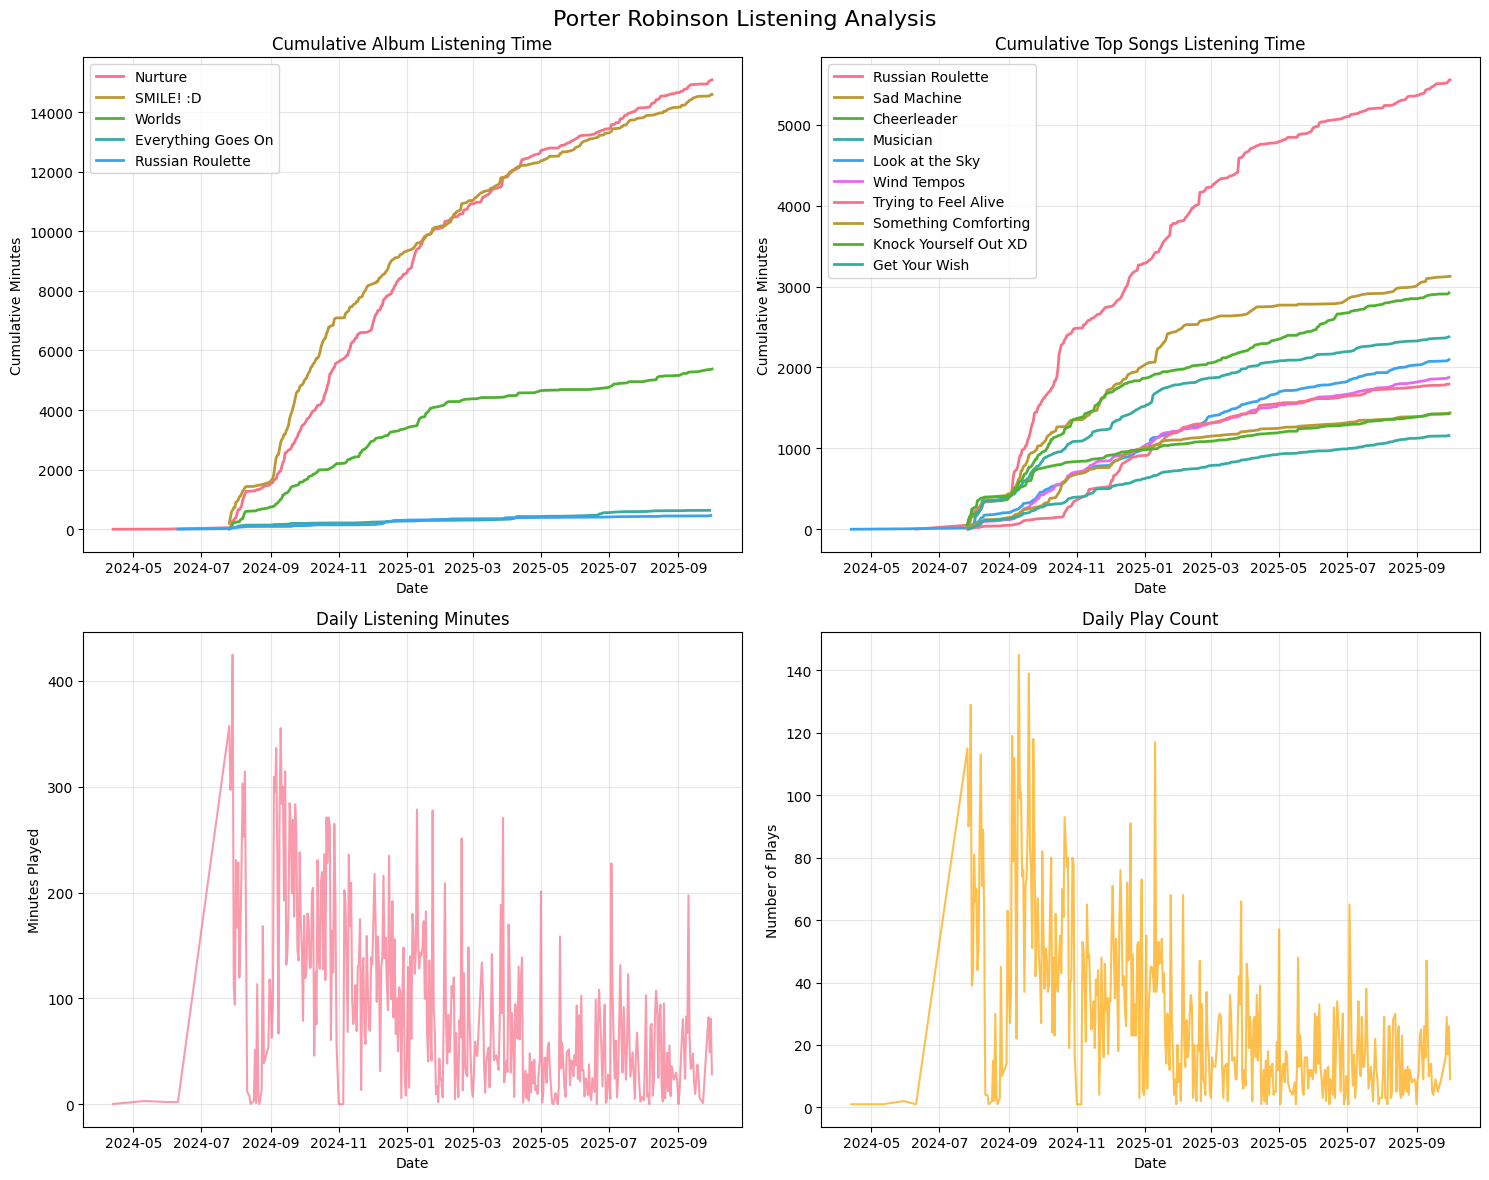


Average Statistics:
Average minutes per day: 91.6
Average plays per day: 29.6
Average minutes per week: 556.7
Average plays per week: 180.0
Average minutes per month: 1963.2
Average plays per month: 634.7

Yearly Breakdown:
2024: 22428.5 minutes (373.8 hours), 7491.0 plays
2025: 14871.7 minutes (247.9 hours), 4569.0 plays

Listening by Day of Week:
Monday: 3.1 avg minutes/day, 1695 total plays
Tuesday: 2.9 avg minutes/day, 1888 total plays
Wednesday: 3.1 avg minutes/day, 1825 total plays
Thursday: 2.9 avg minutes/day, 1789 total plays
Friday: 3.1 avg minutes/day, 1806 total plays
Saturday: 3.3 avg minutes/day, 1645 total plays
Sunday: 3.2 avg minutes/day, 1412 total plays

Listening by Hour:
Peak listening hour: 15:00 (3259.6 total minutes)
Most active hours (top 5):
  15:00 - 3259.6 minutes, 996.0 plays
  2:00 - 2917.9 minutes, 1031.0 plays
  1:00 - 2895.2 minutes, 985.0 plays
  19:00 - 2802.8 minutes, 873.0 plays
  18:00 - 2702.6 minutes, 836.0 plays


In [14]:
porter_df = df[df['track_artist'] == 'Porter Robinson'].copy()

print(f"Porter Robinson Analysis")
print(f"Total listening time: {porter_df['minutes_played'].sum():.1f} minutes ({porter_df['minutes_played'].sum()/60:.1f} hours)")
print(f"Total plays: {len(porter_df):,}")
print(f"Unique songs: {porter_df['track_name'].nunique()}")
print(f"Unique albums: {porter_df['album_name'].nunique()}")
print(f"Date range: {porter_df['date'].min()} to {porter_df['date'].max()}")

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Porter Robinson Listening Analysis', fontsize=16)

porter_albums = porter_df.groupby('album_name')['minutes_played'].sum().sort_values(ascending=False)
print(f"\nTop Albums by Listening Time:")
for i, (album, minutes) in enumerate(porter_albums.head(10).items()):
    print(f"{i+1}. {album}: {minutes:.1f} minutes")

for album in porter_albums.index[:5]:
    album_streams = porter_df[porter_df['album_name'] == album].groupby('date')['minutes_played'].sum()
    cumulative_album = album_streams.cumsum()
    ax1.plot(cumulative_album.index, cumulative_album.values, label=album, linewidth=2)
ax1.set_title('Cumulative Album Listening Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative Minutes')
ax1.legend()
ax1.grid(True, alpha=0.3)

porter_songs = porter_df.groupby('track_name')['minutes_played'].sum().sort_values(ascending=False)
print(f"\nTop Songs by Listening Time:")
for i, (song, minutes) in enumerate(porter_songs.head(10).items()):
    print(f"{i+1}. {song}: {minutes:.1f} minutes")

for song in porter_songs.index[:10]:
    song_streams = porter_df[porter_df['track_name'] == song].groupby('date')['minutes_played'].sum()
    cumulative_song = song_streams.cumsum()
    ax2.plot(cumulative_song.index, cumulative_song.values, label=song, linewidth=2)
ax2.set_title('Cumulative Top Songs Listening Time')
ax2.set_xlabel('Date')
ax2.set_ylabel('Cumulative Minutes')
ax2.legend()
ax2.grid(True, alpha=0.3)

daily_stats = porter_df.groupby('date').agg({
    'minutes_played': 'sum',
    'track_name': 'count'
}).rename(columns={'track_name': 'plays'})

weekly_stats = porter_df.groupby(porter_df['ts'].dt.to_period('W')).agg({
    'minutes_played': 'sum',
    'track_name': 'count'
}).rename(columns={'track_name': 'plays'})

monthly_stats = porter_df.groupby(porter_df['ts'].dt.to_period('M')).agg({
    'minutes_played': 'sum',
    'track_name': 'count'
}).rename(columns={'track_name': 'plays'})

yearly_stats = porter_df.groupby('year').agg({
    'minutes_played': 'sum',
    'track_name': 'count'
}).rename(columns={'track_name': 'plays'})

ax3.plot(daily_stats.index, daily_stats['minutes_played'], alpha=0.7, label='Daily Minutes')
ax3.set_title('Daily Listening Minutes')
ax3.set_xlabel('Date')
ax3.set_ylabel('Minutes Played')
ax3.grid(True, alpha=0.3)

ax4.plot(daily_stats.index, daily_stats['plays'], alpha=0.7, color='orange', label='Daily Plays')
ax4.set_title('Daily Play Count')
ax4.set_xlabel('Date')
ax4.set_ylabel('Number of Plays')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nAverage Statistics:")
print(f"Average minutes per day: {daily_stats['minutes_played'].mean():.1f}")
print(f"Average plays per day: {daily_stats['plays'].mean():.1f}")
print(f"Average minutes per week: {weekly_stats['minutes_played'].mean():.1f}")
print(f"Average plays per week: {weekly_stats['plays'].mean():.1f}")
print(f"Average minutes per month: {monthly_stats['minutes_played'].mean():.1f}")
print(f"Average plays per month: {monthly_stats['plays'].mean():.1f}")

print(f"\nYearly Breakdown:")
for year, stats in yearly_stats.iterrows():
    print(f"{year}: {stats['minutes_played']:.1f} minutes ({stats['minutes_played']/60:.1f} hours), {stats['plays']} plays")

print(f"\nListening by Day of Week:")
dow_stats = porter_df.groupby('day_of_week').agg({
    'minutes_played': 'mean',
    'track_name': 'count'
}).rename(columns={'track_name': 'total_plays'})
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for day in day_order:
    if day in dow_stats.index:
        print(f"{day}: {dow_stats.loc[day, 'minutes_played']:.1f} avg minutes/day, {dow_stats.loc[day, 'total_plays']} total plays")

print(f"\nListening by Hour:")
hour_stats = porter_df.groupby('hour').agg({
    'minutes_played': 'sum',
    'track_name': 'count'
}).rename(columns={'track_name': 'plays'})
peak_hour = hour_stats['minutes_played'].idxmax()
print(f"Peak listening hour: {peak_hour}:00 ({hour_stats.loc[peak_hour, 'minutes_played']:.1f} total minutes)")
print(f"Most active hours (top 5):")
for hour, stats in hour_stats.sort_values('minutes_played', ascending=False).head(5).iterrows():
    print(f"  {hour}:00 - {stats['minutes_played']:.1f} minutes, {stats['plays']} plays")


In [15]:
# Load data first (run this if df is not defined)
df = load_spotify_data()
summary = get_data_summary(df)

# Separate data for 2024 and 2025
df_2024 = df[df['year'] == 2024]
df_2025 = df[df['year'] == 2025]

print("=== SPOTIFY LISTENING STATS FOR 2024 ===\n")

# 2024 Overall stats
print("2024 Overall Stats:")
print(f"Total listening records: {len(df_2024):,}")
print(f"Total listening time: {df_2024['minutes_played'].sum():.1f} minutes ({df_2024['minutes_played'].sum()/60:.1f} hours)")
print(f"Unique tracks: {df_2024['spotify_track_uri'].nunique():,}")
print(f"Unique artists: {df_2024['track_artist'].nunique():,}")
print(f"Skip rate: {df_2024['is_skip'].mean()*100:.1f}%")

print("\n=== TOP ARTISTS (2024) ===")
top_artists_2024 = df_2024.groupby('track_artist')['minutes_played'].sum().sort_values(ascending=False).head(10)
for i, (artist, minutes) in enumerate(top_artists_2024.items(), 1):
    hours = minutes / 60
    print(f"{i:2d}. {artist}: {hours:.1f} hours ({minutes:.0f} minutes)")

print("\n=== TOP TRACKS (2024) ===")
top_tracks_2024 = df_2024.groupby(['track_name', 'track_artist'])['minutes_played'].sum().sort_values(ascending=False).head(10)
for i, ((track, artist), minutes) in enumerate(top_tracks_2024.items(), 1):
    hours = minutes / 60
    print(f"{i:2d}. {track} by {artist}: {hours:.1f} hours ({minutes:.0f} minutes)")

print("\n=== MONTHLY LISTENING TRENDS (2024) ===")
monthly_2024 = df_2024.groupby('month')['minutes_played'].sum().sort_values(ascending=False)
for month, minutes in monthly_2024.items():
    hours = minutes / 60
    print(f"{month}: {hours:.1f} hours")

print("\n" + "="*60)
print("=== SPOTIFY LISTENING STATS FOR 2025 ===\n")

# 2025 Overall stats
print("2025 Overall Stats:")
print(f"Total listening records: {len(df_2025):,}")
print(f"Total listening time: {df_2025['minutes_played'].sum():.1f} minutes ({df_2025['minutes_played'].sum()/60:.1f} hours)")
print(f"Unique tracks: {df_2025['spotify_track_uri'].nunique():,}")
print(f"Unique artists: {df_2025['track_artist'].nunique():,}")
print(f"Skip rate: {df_2025['is_skip'].mean()*100:.1f}%")

print("\n=== TOP ARTISTS (2025) ===")
top_artists_2025 = df_2025.groupby('track_artist')['minutes_played'].sum().sort_values(ascending=False).head(10)
for i, (artist, minutes) in enumerate(top_artists_2025.items(), 1):
    hours = minutes / 60
    print(f"{i:2d}. {artist}: {hours:.1f} hours ({minutes:.0f} minutes)")

print("\n=== TOP TRACKS (2025) ===")
top_tracks_2025 = df_2025.groupby(['track_name', 'track_artist'])['minutes_played'].sum().sort_values(ascending=False).head(10)
for i, ((track, artist), minutes) in enumerate(top_tracks_2025.items(), 1):
    hours = minutes / 60
    print(f"{i:2d}. {track} by {artist}: {hours:.1f} hours ({minutes:.0f} minutes)")

print("\n=== MONTHLY LISTENING TRENDS (2025) ===")
monthly_2025 = df_2025.groupby('month')['minutes_played'].sum().sort_values(ascending=False)
for month, minutes in monthly_2025.items():
    hours = minutes / 60
    print(f"{month}: {hours:.1f} hours")

print("\n" + "="*60)
print("=== YEAR COMPARISON ===")
print(f"2024 Total: {df_2024['minutes_played'].sum()/60:.1f} hours")
print(f"2025 Total: {df_2025['minutes_played'].sum()/60:.1f} hours")
print(f"Difference: {(df_2025['minutes_played'].sum() - df_2024['minutes_played'].sum())/60:.1f} hours")

Loading data from combined_data.json...
Loaded 49,050 listening records
Preprocessing data...
Preprocessing complete!
Date range: 2023-06-01 to 2025-10-01
Total listening time: 122547.8 minutes (2042.5 hours)
=== SPOTIFY LISTENING STATS FOR 2024 ===

2024 Overall Stats:
Total listening records: 23,851
Total listening time: 57832.4 minutes (963.9 hours)
Unique tracks: 3,060
Unique artists: 826
Skip rate: 32.0%

=== TOP ARTISTS (2024) ===
 1. Porter Robinson: 373.8 hours (22429 minutes)
 2. AJR: 144.6 hours (8676 minutes)
 3. Laufey: 103.0 hours (6181 minutes)
 4. Twenty One Pilots: 34.8 hours (2086 minutes)
 5. Radiohead: 34.2 hours (2052 minutes)
 6. Ed Sheeran: 29.4 hours (1762 minutes)
 7. Frank Sinatra: 26.1 hours (1564 minutes)
 8. Bo Burnham: 15.2 hours (913 minutes)
 9. Jon Bellion: 14.5 hours (868 minutes)
10. Adam Wong: 12.6 hours (756 minutes)

=== TOP TRACKS (2024) ===
 1. Russian Roulette by Porter Robinson: 54.8 hours (3286 minutes)
 2. Sad Machine by Porter Robinson: 33.1 

In [16]:
# Media Type Analysis
print("="*60)
print("MEDIA TYPE BREAKDOWN")
print("="*60)

media_counts = df['media_type'].value_counts()
media_percentages = (df['media_type'].value_counts(normalize=True) * 100).round(1)
media_time = df.groupby('media_type')['minutes_played'].sum()

for media_type in media_counts.index:
    count = media_counts[media_type]
    percentage = media_percentages[media_type]
    total_hours = media_time[media_type] / 60
    print(f"{media_type.title()}: {count:,} plays ({percentage}%) - {total_hours:.1f} hours")

# Verification that "Unknown Artist" issue is fixed
unknown_count = (df['track_artist'] == 'Unknown Artist').sum()
print(f"\n✅ Records with 'Unknown Artist': {unknown_count}")

print("\nSample entries by media type:")
for media_type in df['media_type'].unique():
    sample = df[df['media_type'] == media_type].iloc[0]
    print(f"\n{media_type.upper()}:")
    print(f"  Title: {sample['track_name']}")
    print(f"  Artist/Show: {sample['track_artist']}")
    print(f"  Album: {sample['album_name']}")

MEDIA TYPE BREAKDOWN
Song: 47,958 plays (97.8%) - 1896.0 hours
Podcast: 761 plays (1.6%) - 117.1 hours
Audiobook: 331 plays (0.7%) - 29.4 hours

✅ Records with 'Unknown Artist': 0

Sample entries by media type:

SONG:
  Title: How Deep Is Your Love
  Artist/Show: Bee Gees
  Album: Greatest

PODCAST:
  Title: Mozart 2x Speed Left Ear , Bible In Chinese Right Ear
  Artist/Show: 04Roker's Uploads
  Album: Podcast Episode

AUDIOBOOK:
  Title: Opening Credits
  Artist/Show: The Art of War
  Album: Audiobook


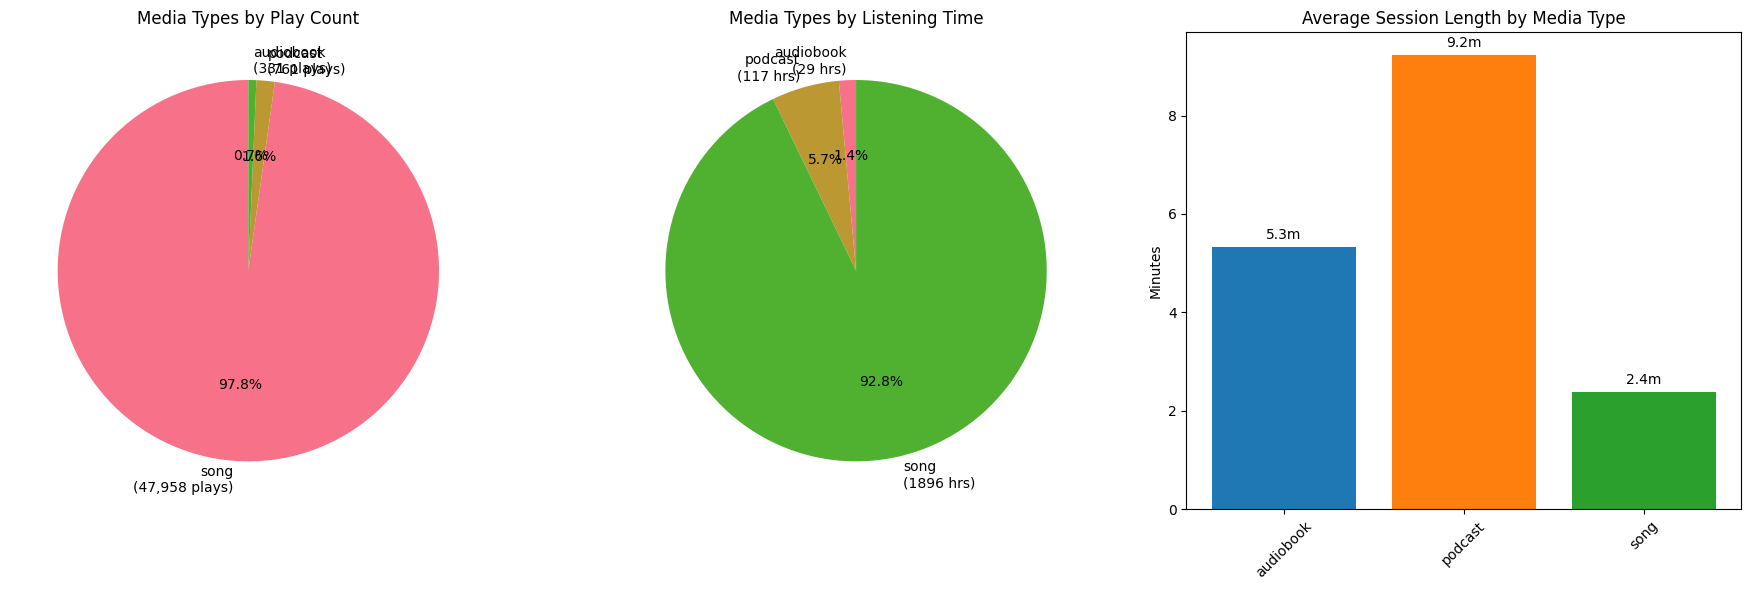

In [17]:
# Media Type Visualizations
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Play count distribution
axes[0].pie(media_counts.values, labels=[f"{label}\n({count:,} plays)" for label, count in zip(media_counts.index, media_counts.values)], 
           autopct='%1.1f%%', startangle=90)
axes[0].set_title('Media Types by Play Count')

# Listening time distribution
axes[1].pie(media_time.values, labels=[f"{label}\n({time/60:.0f} hrs)" for label, time in zip(media_time.index, media_time.values)], 
           autopct='%1.1f%%', startangle=90)
axes[1].set_title('Media Types by Listening Time')

# Average session length
avg_session = df.groupby('media_type')['minutes_played'].mean()
bars = axes[2].bar(avg_session.index, avg_session.values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[2].set_title('Average Session Length by Media Type')
axes[2].set_ylabel('Minutes')
axes[2].tick_params(axis='x', rotation=45)

for bar, value in zip(bars, avg_session.values):
    axes[2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
                f'{value:.1f}m', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [18]:
# Top Content by Media Type
print("="*60)
print("TOP CONTENT BY MEDIA TYPE")
print("="*60)

for media_type in ['song', 'podcast', 'audiobook']:
    if media_type in df['media_type'].values:
        print(f"\n--- TOP {media_type.upper()} ---")
        media_df = df[df['media_type'] == media_type]
        
        if media_type == 'song':
            top_content = media_df.groupby(['track_name', 'track_artist'])['minutes_played'].sum().sort_values(ascending=False).head(5)
            for i, ((track, artist), minutes) in enumerate(top_content.items(), 1):
                print(f"{i}. {track} by {artist}: {minutes:.1f} minutes")
        
        elif media_type == 'podcast':
            top_content = media_df.groupby(['track_name', 'track_artist'])['minutes_played'].sum().sort_values(ascending=False).head(5)
            for i, ((episode, show), minutes) in enumerate(top_content.items(), 1):
                print(f"{i}. {episode} from {show}: {minutes:.1f} minutes")
        
        elif media_type == 'audiobook':
            top_content = media_df.groupby(['track_artist'])['minutes_played'].sum().sort_values(ascending=False).head(5)
            for i, (book, minutes) in enumerate(top_content.items(), 1):
                print(f"{i}. {book}: {minutes:.1f} minutes")

# Skip rates by media type
skip_rates = df.groupby('media_type')['is_skip'].mean() * 100
print(f"\n" + "="*60)
print("SKIP RATES BY MEDIA TYPE")
print("="*60)
for media_type, skip_rate in skip_rates.items():
    print(f"{media_type.title()}: {skip_rate:.1f}%")

TOP CONTENT BY MEDIA TYPE

--- TOP SONG ---
1. Russian Roulette by Porter Robinson: 5555.9 minutes
2. Sad Machine by Porter Robinson: 3126.9 minutes
3. Cheerleader by Porter Robinson: 2922.4 minutes
4. Musician by Porter Robinson: 2378.5 minutes
5. Look at the Sky by Porter Robinson: 2097.5 minutes

--- TOP PODCAST ---
1. #461 – ThePrimeagen: Programming, AI, ADHD, Productivity, Addiction, and God from Lex Fridman Podcast: 320.1 minutes
2. #118 Nick Irving - "The Reaper" from Shawn Ryan Show: 308.4 minutes
3. #440 – Pieter Levels: Programming, Viral AI Startups, and Digital Nomad Life from Lex Fridman Podcast: 255.5 minutes
4. #310 – Andrew Bustamante: CIA Spy from Lex Fridman Podcast: 229.4 minutes
5. #922 - Naval Ravikant - 44 Harsh Truths About Human Nature from Modern Wisdom: 196.1 minutes

--- TOP AUDIOBOOK ---
1. Steve Jobs: 605.4 minutes
2. The Anthropocene Reviewed: 385.2 minutes
3. Everything Is Tuberculosis: 361.1 minutes
4. I Hate the Ivy League: 315.6 minutes
5. The Metamor